In [1]:
import numpy as np
from scripts.spike_synthetic import SpikeSynthetic
from scripts.gmm import test_gmm

# Test GMM


Generated data: n_component = 2


--- EM Optimization ---
Iter 1: log-likelihood = -700.603
Converged at iteration 8.


--- Mixture Weights ---
True: [0.5 0.5]
MyGMM: [0.50689379 0.49310621]
Sklearn: [0.50138987 0.49861013]


--- Log-Likelihood Comparison ---
True log-likelihood of data: -684.2145443593153
MyGMM estimated log-likelihood of data: -680.8587565690103
Sklearn estimated log-likelihood of data: -678.574911721166




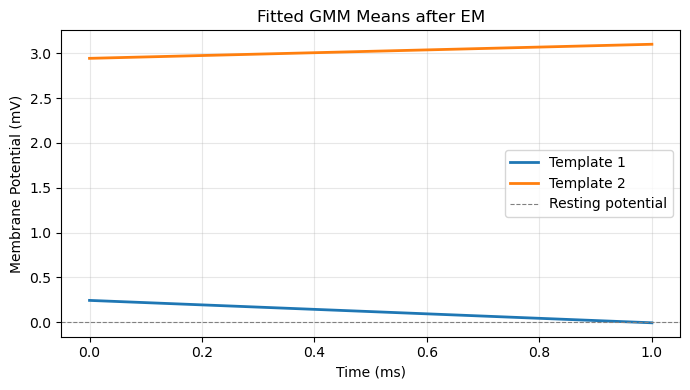

In [2]:
# Ground truth parameters
means = np.array([[0, 0], [3, 3]])   # 2 components in 2D
cov = np.eye(2)                      # shared covariance
np.random.seed(1)

# Generate synthetic data
X = np.vstack([
    np.random.multivariate_normal(means[0], cov, 100),
    np.random.multivariate_normal(means[1], cov, 100)
])

labels_true = np.hstack([
    np.full(100, 0, dtype=int),
    np.full(100, 1, dtype=int),
])

# Fit model
means_init = np.array([[1, 1], [4, 4]])

gmm_means, gmm_weights, gmm_responsibilities = test_gmm(true_means=means, 
                                                        true_cov=cov, 
                                                        means_init=means_init, 
                                                        true_weights=np.array([0.5, 0.5]),
                                                        X=X,
                                                        labels_true=labels_true)

# Test on the synthetic data

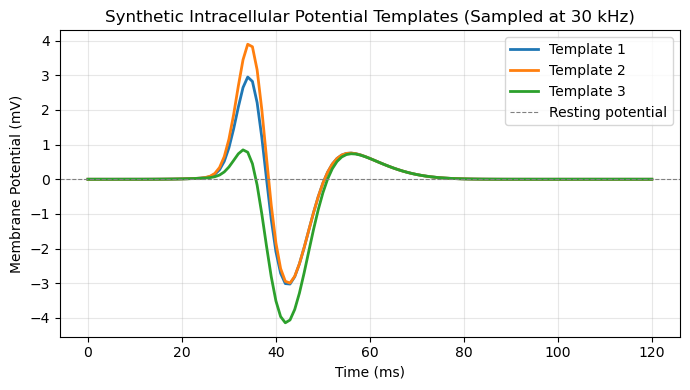

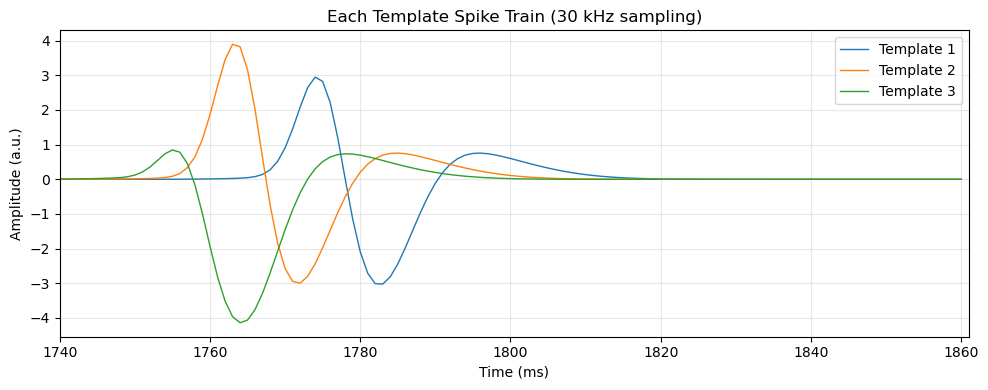

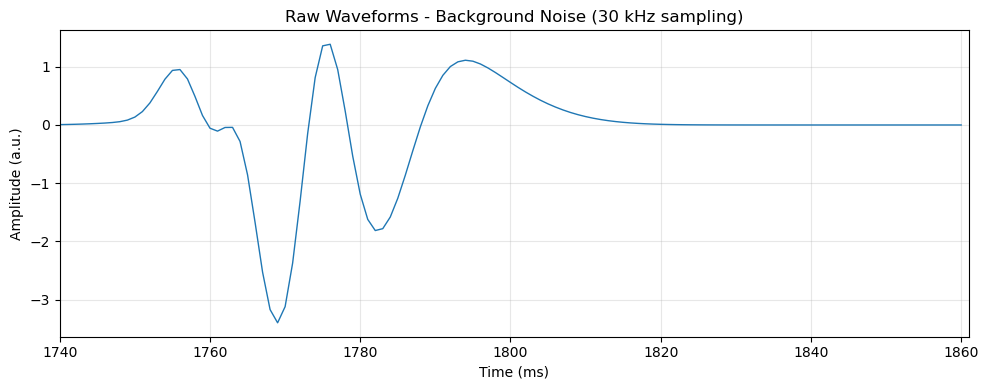

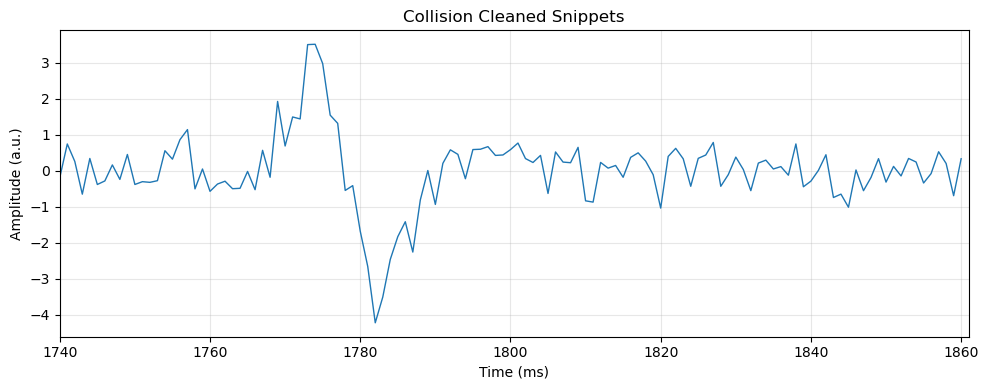

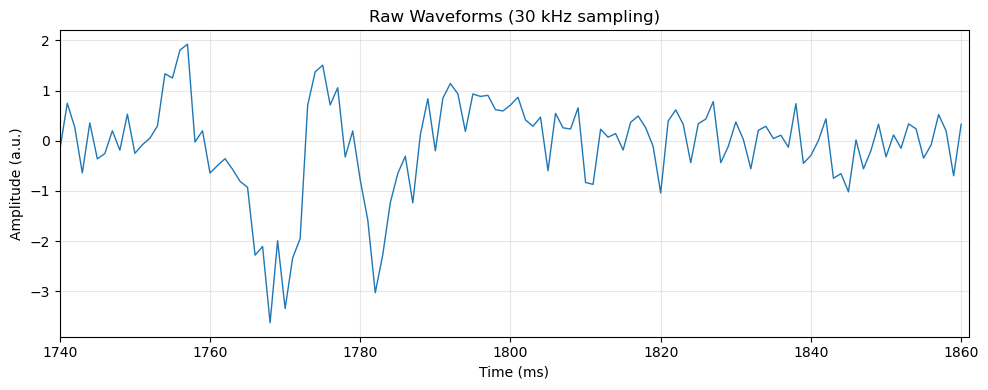

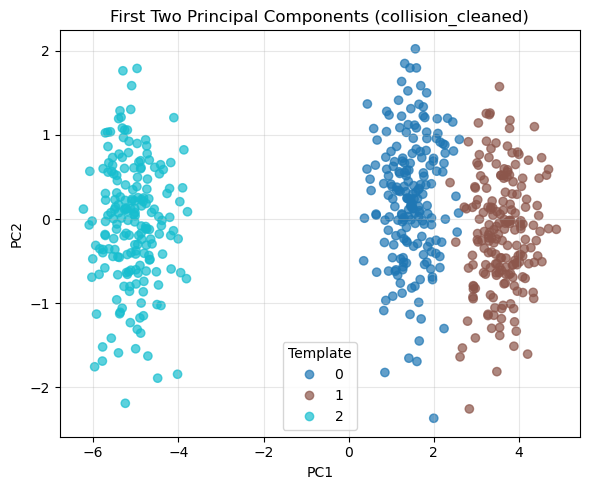

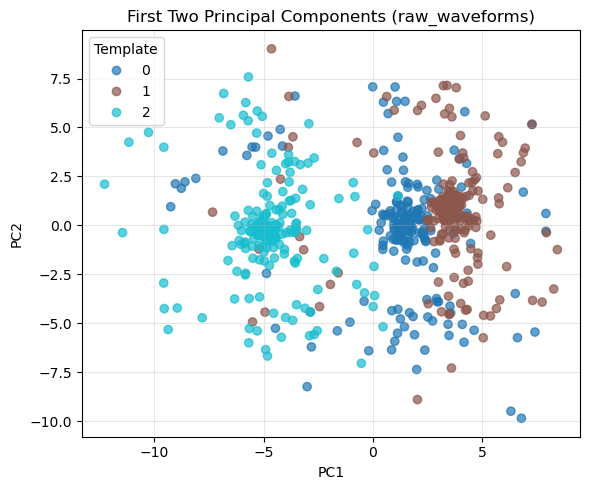

In [3]:
ss = SpikeSynthetic(noise_std=0.5, num_templates=3, random_state=42)
ss.generate_spike()
spike_stamp = ss.get_spike_times_for_template_i(0)[5]
start = spike_stamp - 42
end = start + 121
ss.template_obj.plot()
ss.plot_each_template(start=start, end=end)
ss.plot_spike_clean(start=start, end=end)
ss.plot_collision_cleaned_snippets(start=start, end=end, template_idx=0)
ss.plot_raw_waveforms(start = start, end=end)

ss.plot_snippet_pca(choice="collision_cleaned")
ss.plot_snippet_pca(choice="raw_waveforms")

# Apply GMMs on collision-cleaned snippets

=== Gaussian Mixture Model Training Summary Collision Cleaned===
Weigts initialization: [0.33333333 0.33333333 0.33333333]
Generated data: n_component = 3


--- EM Optimization ---
Iter 1: log-likelihood = -58186.895
Converged at iteration 7.


--- Mixture Weights ---
True: [0.33333333 0.33333333 0.33333333]
MyGMM: [0.33343093 0.33323574 0.33333333]
Sklearn: [0.33353713 0.33333333 0.33312953]


--- Log-Likelihood Comparison ---
True log-likelihood of data: -58277.841485184086
MyGMM estimated log-likelihood of data: -58186.7469121911
Sklearn estimated log-likelihood of data: -51374.578379681945




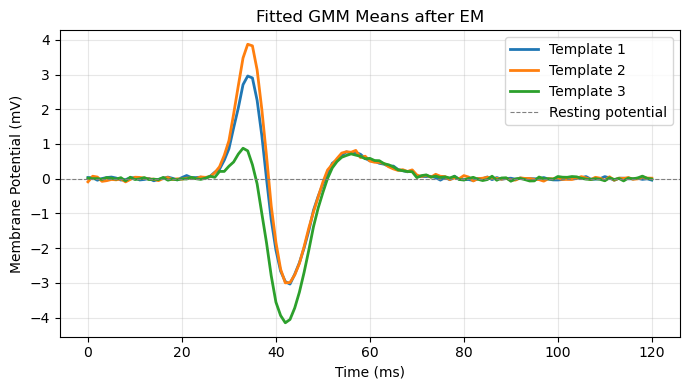

In [4]:
X, labels = ss.snippets(choice="collision_cleaned")
initial_weights = ss.weights(labels)
print("=== Gaussian Mixture Model Training Summary Collision Cleaned===")
print("Weigts initialization:", initial_weights)

rng = np.random.default_rng(3)
true_means = ss.template_obj.template
true_cov = np.eye(ss.template_obj.template.shape[1]) * ss.noise_std  # assumed covariance
means = ss.template_obj.template + rng.normal(0, 0.01, size=ss.template_obj.template.shape)  # perturbed initial means
weights = initial_weights
gmm_means, gmm_weights, gmm_responsibilities = test_gmm(true_means=true_means,
                                                        true_cov=true_cov,
                                                        means_init=means,
                                                        true_weights=weights,
                                                        X=X,
                                                        labels_true=labels)



# Apply GMMs to Raw Waveforms snippets

=== Gaussian Mixture Model Training Summary Raw Waveforms===
Weigts initialization: [0.33333333 0.33333333 0.33333333]


Generated data: n_component = 3


--- EM Optimization ---
Iter 1: log-likelihood = -103376.273
Iter 10: log-likelihood = -102763.591
Iter 20: log-likelihood = -102755.379
Converged at iteration 25.


--- Mixture Weights ---
True: [0.33333333 0.33333333 0.33333333]
MyGMM: [0.49210997 0.13654742 0.3713426 ]
Sklearn: [0.15946874 0.79217448 0.04835678]


--- Log-Likelihood Comparison ---
True log-likelihood of data: -104530.09411962087
MyGMM estimated log-likelihood of data: -102755.09016433134
Sklearn estimated log-likelihood of data: -96151.64285907931




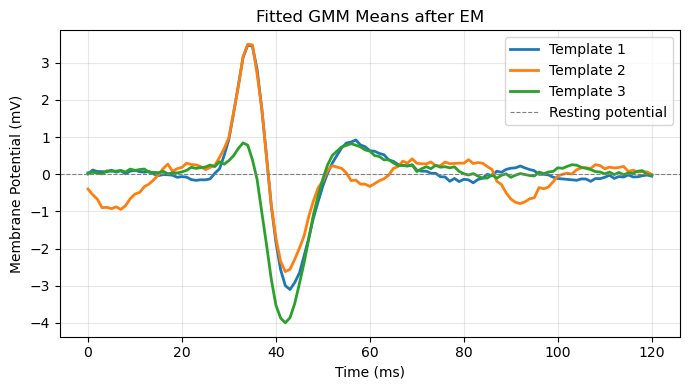

In [5]:
# take snippets from raw waveforms
X, labels = ss.snippets(choice="raw_waveforms")
initial_weights = ss.weights(labels)
print("=== Gaussian Mixture Model Training Summary Raw Waveforms===")
print("Weigts initialization:", initial_weights)
print("\n")

rng = np.random.default_rng(3)
true_means = ss.template_obj.template
true_cov = np.eye(ss.template_obj.template.shape[1]) * ss.noise_std  # assumed covariance
means = ss.template_obj.template + rng.normal(0, 1, size=ss.template_obj.template.shape)  # perturbed initial means
weights = initial_weights
gmm_means, gmm_weights, gmm_responsibilities = test_gmm(true_means=true_means,
                                                        true_cov=true_cov,
                                                        means_init=means,
                                                        true_weights=weights,
                                                        X=X,
                                                        labels_true=labels)